# Proplem Overview:

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
warnings.filterwarnings('ignore')
from helpers.helper import show_feature_stats, show_feature


# Config

In [2]:
sns.set_palette("pastel")

In [3]:
DATA_PATH = "../Data"

# Data Check:

In [4]:
df = pd.read_csv(os.path.join(DATA_PATH, 'Telco-Customer-Churn.csv'))
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [8]:
for col in categorical_columns:
    print('\n')
    print(f"{col} unique values are:\n")
    print(df[col].unique())
    print("***"*10)




customerID unique values are:

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
******************************


gender unique values are:

['Female' 'Male']
******************************


Partner unique values are:

['Yes' 'No']
******************************


Dependents unique values are:

['No' 'Yes']
******************************


PhoneService unique values are:

['No' 'Yes']
******************************


MultipleLines unique values are:

['No phone service' 'No' 'Yes']
******************************


InternetService unique values are:

['DSL' 'Fiber optic' 'No']
******************************


OnlineSecurity unique values are:

['No' 'Yes' 'No internet service']
******************************


OnlineBackup unique values are:

['Yes' 'No' 'No internet service']
******************************


DeviceProtection unique values are:

['No' 'Yes' 'No internet service']
******************************


TechSupport unique values are:

['No'

In [9]:
# check duplicates
df.duplicated(subset= 'customerID').sum()

np.int64(0)

After looking at the data, I noticed two main problems:

- First, some values need normalization.

- Secondly, some of the data types were incorrect.

## Fixing Problems

In [10]:
df1 = df.copy()

In [11]:
# change Total Charges into numerical 
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors= 'coerce')
df1.TotalCharges.dtype

dtype('float64')

In [12]:
# now check missing values
df1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

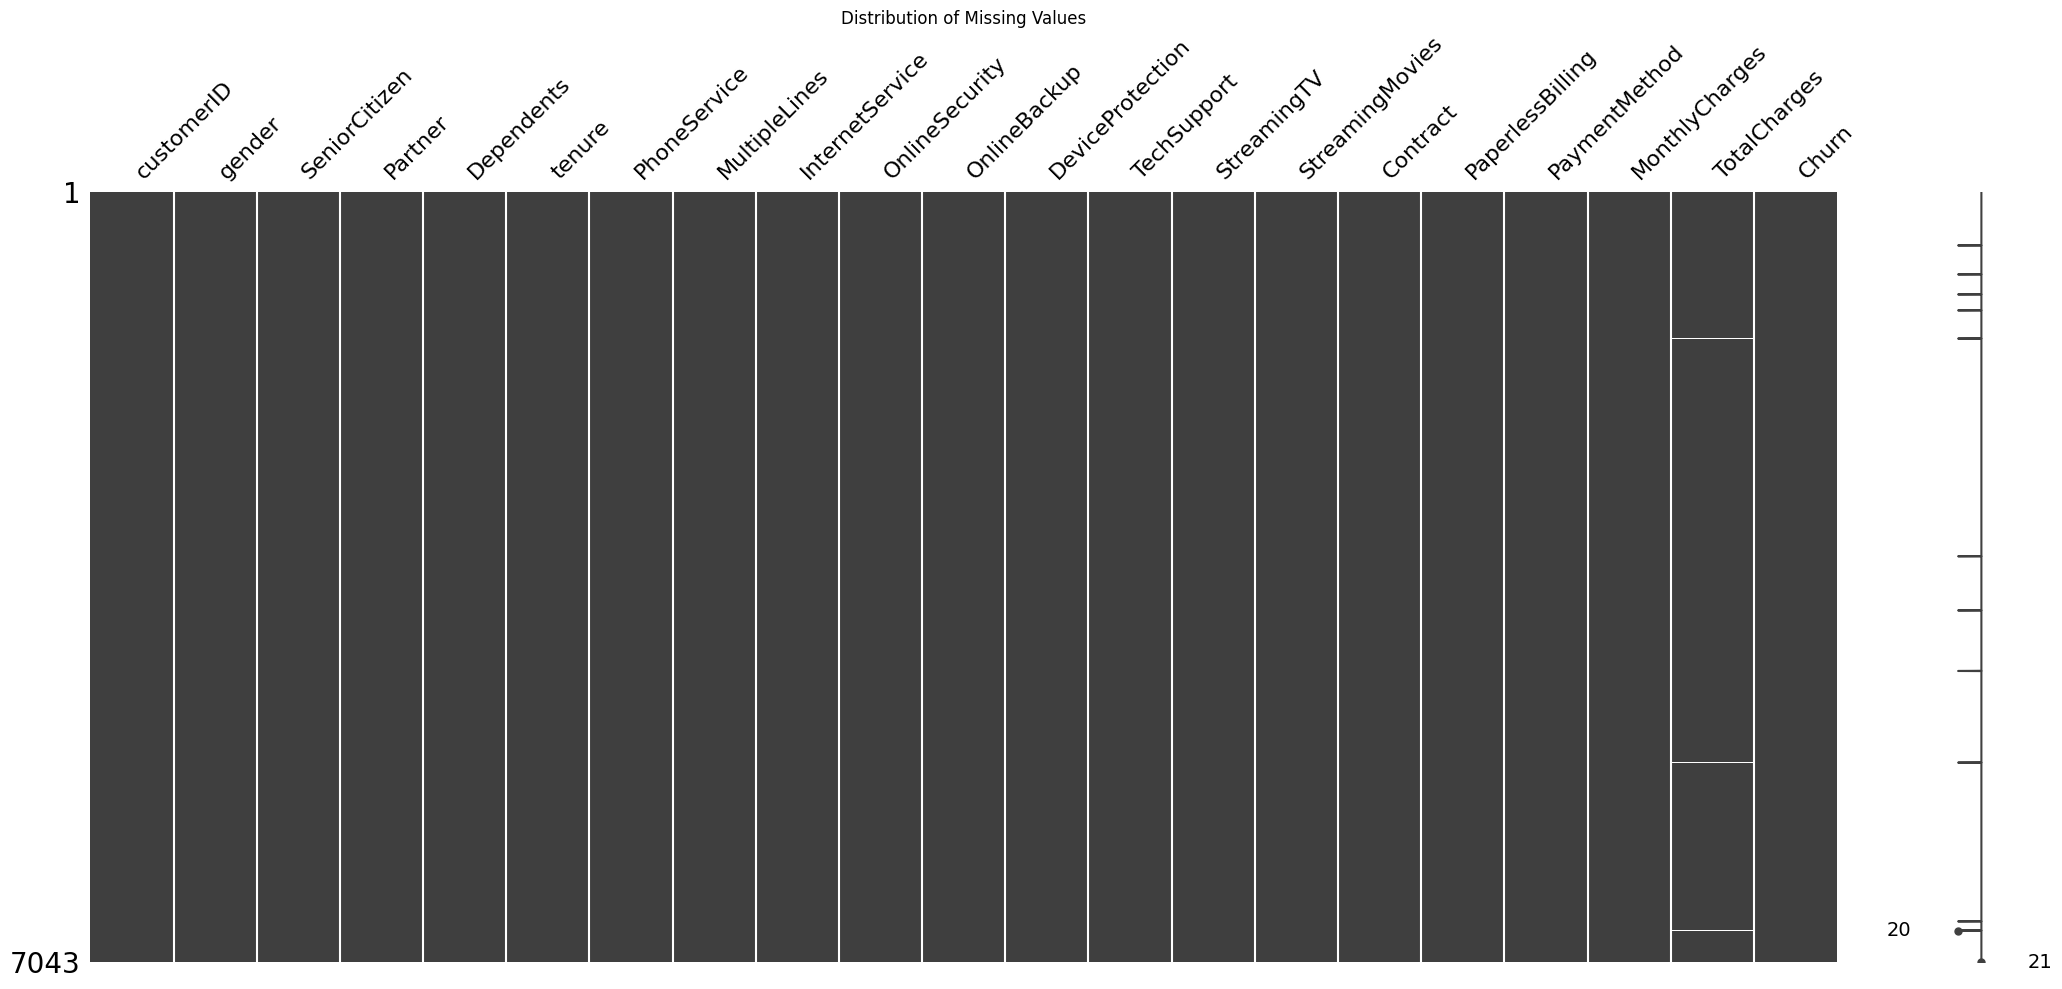

In [13]:
msno.matrix(df1)
plt.title("Distribution of Missing Values")
plt.show()

We found the TotalCharges column has some missing values; however, their proportion is less than 5%, and they seem to be randomly missing, so we decided to drop these records.

In [14]:
df1.dropna(inplace=True)
df1.shape


(7032, 21)

In [15]:
# secondly, we normalize features
df1['MultipleLines'] = df1['MultipleLines'].replace({'No phone service': "No"})
df1['OnlineSecurity'] = df1['OnlineSecurity'].replace({'No internet service': "No"})
df1['OnlineBackup'] = df1['OnlineBackup'].replace({'No internet service': "No"})
df1['DeviceProtection'] = df1['DeviceProtection'].replace({'No internet service': "No"})
df1['TechSupport'] = df1['TechSupport'].replace({'No internet service': "No"})
df1['StreamingTV'] = df1['StreamingTV'].replace({'No internet service': "No"})
df1['StreamingMovies'] = df1['StreamingMovies'].replace({'No internet service': "No"})



In [16]:
# check
for col in categorical_columns:
    print('\n')
    print(f"{col} unique values are:\n")
    print(df1[col].unique())
    print("***"*10)




customerID unique values are:

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
******************************


gender unique values are:

['Female' 'Male']
******************************


Partner unique values are:

['Yes' 'No']
******************************


Dependents unique values are:

['No' 'Yes']
******************************


PhoneService unique values are:

['No' 'Yes']
******************************


MultipleLines unique values are:

['No' 'Yes']
******************************


InternetService unique values are:

['DSL' 'Fiber optic' 'No']
******************************


OnlineSecurity unique values are:

['No' 'Yes']
******************************


OnlineBackup unique values are:

['Yes' 'No']
******************************


DeviceProtection unique values are:

['No' 'Yes']
******************************


TechSupport unique values are:

['No' 'Yes']
******************************


StreamingTV unique values are:

['No' 'Yes']

In [17]:
# Select Yes/No columns (object type with only Yes/No values)
yes_no_cols = df1.columns[df1.isin(['Yes', 'No']).any()]

# Replace Yes -> 1, No -> 0
df1[yes_no_cols] = df1[yes_no_cols].replace({'Yes': 1, 'No': 0})


# EDA:

1. Churn overview

In [18]:
df1.Churn.value_counts(normalize= True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

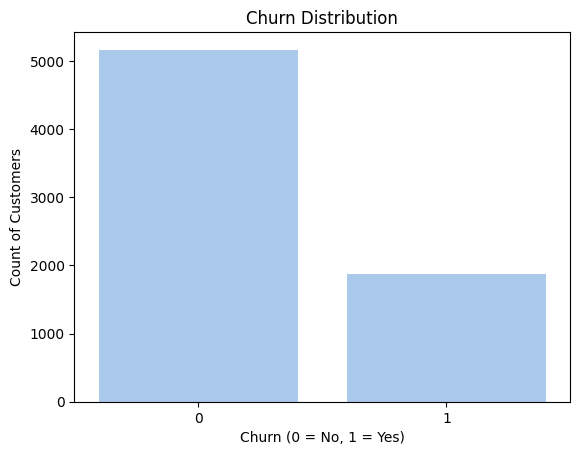

In [19]:
sns.countplot(x = df1.Churn, )
plt.title('Churn Distribution')
plt.ylabel('Count of Customers')
plt.xlabel(f"Churn (0 = No, 1 = Yes)")
plt.show()

* We see data is highly imbalnced. We need to consider this in the modeling step.

2. Customer Demographics:

    a. Senior Citizen:

In [20]:
show_feature_stats('SeniorCitizen', 'Churn', df1)

Distribution of SeniorCitizen is:
SeniorCitizen
0    0.8376
1    0.1624
Name: proportion, dtype: float64

Distribution of SeniorCitizen in regards to Churn is:
SeniorCitizen  Churn
0              0        4497
               1        1393
1              0         666
               1         476
Name: Churn, dtype: int64


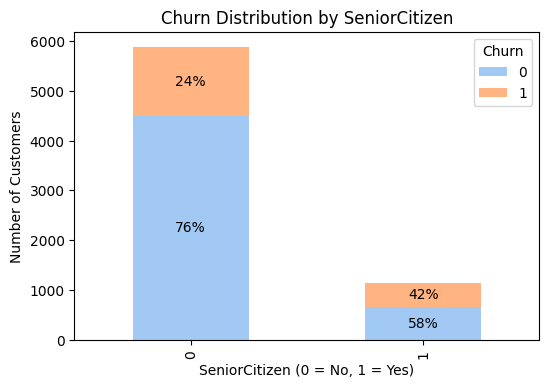

In [21]:
show_feature('SeniorCitizen', 'Churn', df1)

    b. Gender:

In [22]:
show_feature_stats('gender', 'Churn', df1)

Distribution of gender is:
gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64

Distribution of gender in regards to Churn is:
gender  Churn
Female  0        2544
        1         939
Male    0        2619
        1         930
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Churn Distribution across Gender')

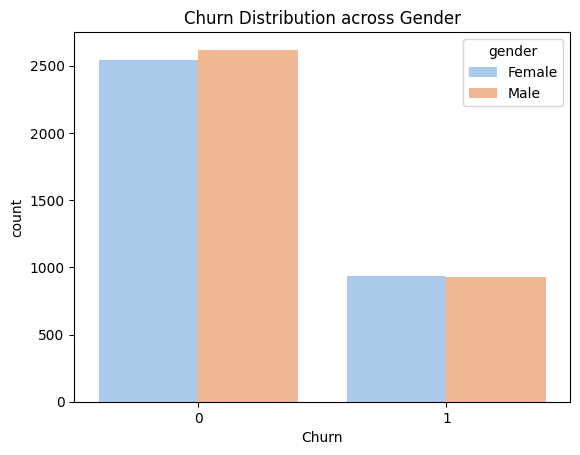

In [34]:
sns.countplot(data= df1, x= 'Churn', hue= 'gender')
plt.title("Churn Distribution across Gender")


    c.Partner


In [24]:
show_feature_stats('Partner', 'Churn', df1)

Distribution of Partner is:
Partner
0    0.517491
1    0.482509
Name: proportion, dtype: float64

Distribution of Partner in regards to Churn is:
Partner  Churn
0        0        2439
         1        1200
1        0        2724
         1         669
Name: Churn, dtype: int64


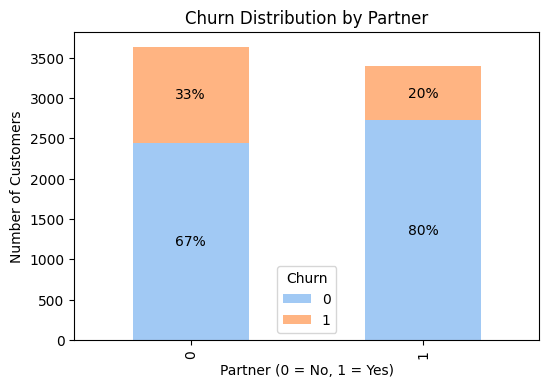

In [25]:
show_feature('Partner', 'Churn', df1)

    d. Dependents:

In [26]:
show_feature_stats('Dependents', 'Churn', df1)

Distribution of Dependents is:
Dependents
0    0.701507
1    0.298493
Name: proportion, dtype: float64

Distribution of Dependents in regards to Churn is:
Dependents  Churn
0           0        3390
            1        1543
1           0        1773
            1         326
Name: Churn, dtype: int64


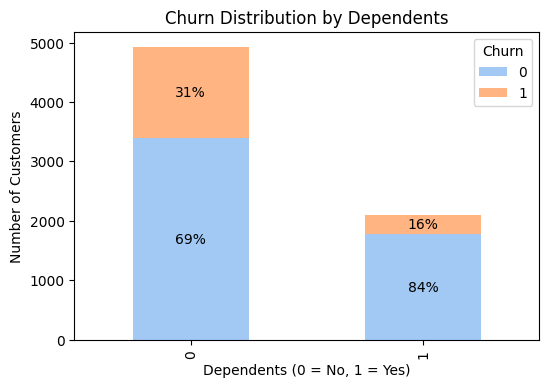

In [27]:
show_feature('Dependents', 'Churn', df1)

3. Customer Account Information

    a. tenure

In [29]:
df1.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

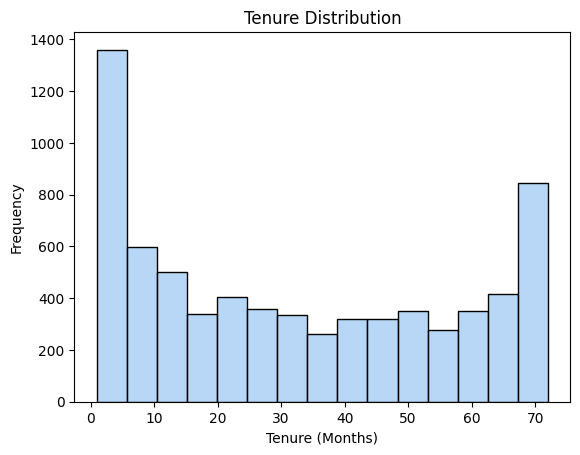

In [43]:
sns.histplot(df1.tenure)
plt.title('Tenure Distribution')
plt.xlabel("Tenure (Months)")
plt.ylabel('Frequency')
plt.show()

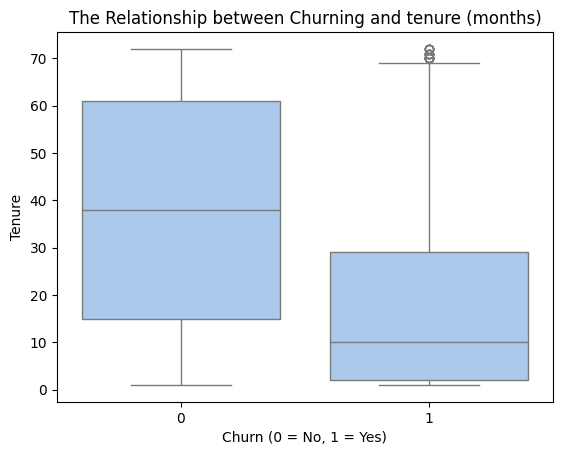

In [31]:
sns.boxplot(data= df1, x = 'Churn', y = 'tenure')
plt.title("The Relationship between Churning and tenure (months)")
plt.xlabel(f"Churn (0 = No, 1 = Yes)")
plt.ylabel('Tenure')
plt.show()

    b.Contract

In [32]:
df1.Contract.value_counts(normalize= True)

Contract
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: proportion, dtype: float64

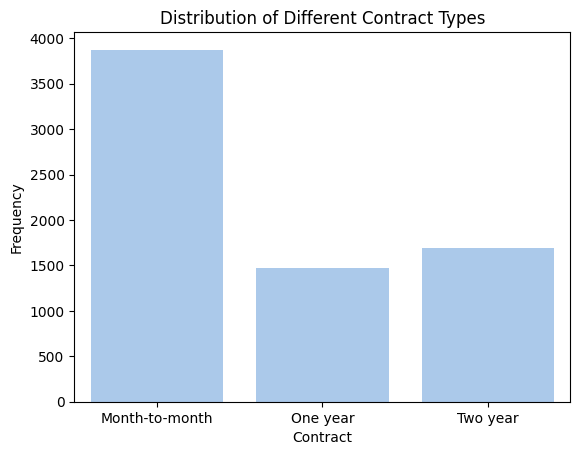

In [44]:
sns.countplot(x = df.Contract)
plt.title('Distribution of Different Contract Types')
plt.ylabel('Frequency')
plt.show()

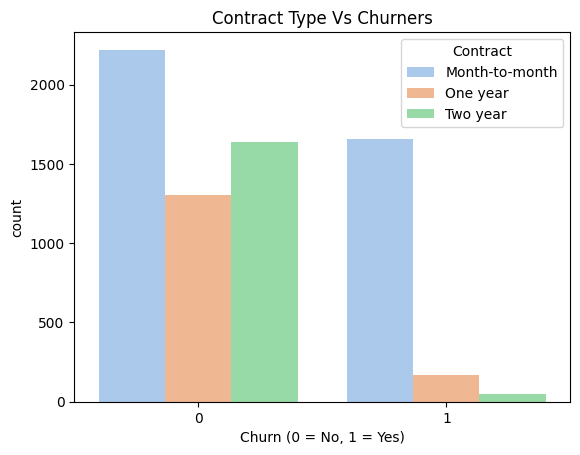

In [42]:
sns.countplot(data= df1, hue = 'Contract', x= 'Churn')
plt.title('Contract Type Vs Churners')
plt.xlabel(f"Churn (0 = No, 1 = Yes)")
plt.show()


    c. Paperless Billing:

In [45]:
show_feature_stats('PaperlessBilling', 'Churn', df1)

Distribution of PaperlessBilling is:
PaperlessBilling
1    0.592719
0    0.407281
Name: proportion, dtype: float64

Distribution of PaperlessBilling in regards to Churn is:
PaperlessBilling  Churn
0                 0        2395
                  1         469
1                 0        2768
                  1        1400
Name: Churn, dtype: int64


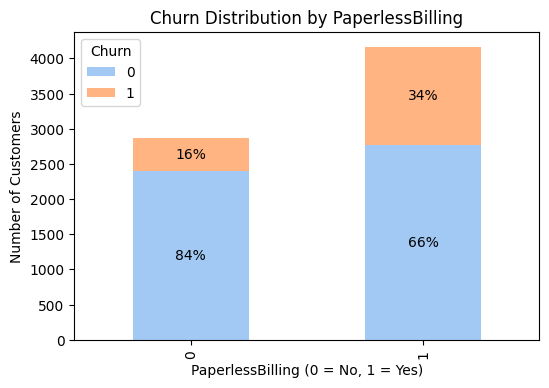

In [46]:
show_feature('PaperlessBilling', 'Churn', df1)

    d. Payment Method

In [47]:
df1.PaymentMethod.value_counts(normalize= True)

PaymentMethod
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: proportion, dtype: float64

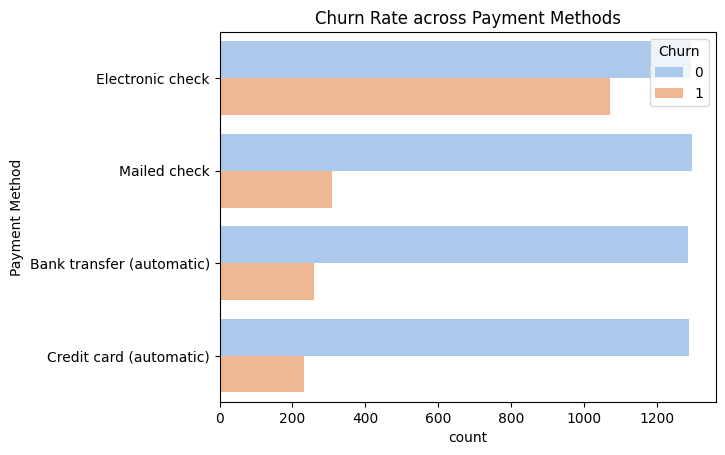

In [49]:
sns.countplot(data= df1,  y = 'PaymentMethod', hue= 'Churn')
plt.title('Churn Rate across Payment Methods')
plt.ylabel('Payment Method')
plt.show()

    e. MonthlyCharges 

In [51]:
df1.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

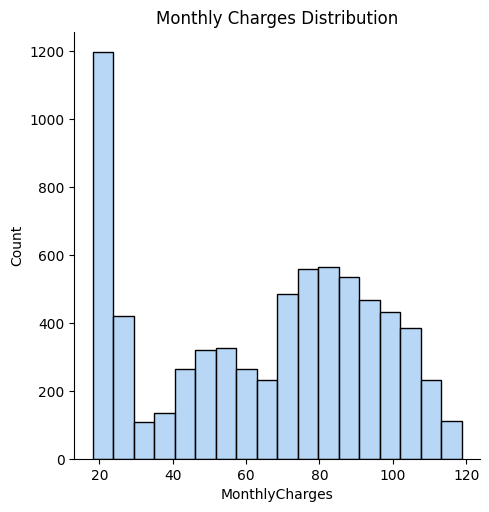

In [50]:
sns.displot(df1.MonthlyCharges)
plt.title('Monthly Charges Distribution')
plt.show()

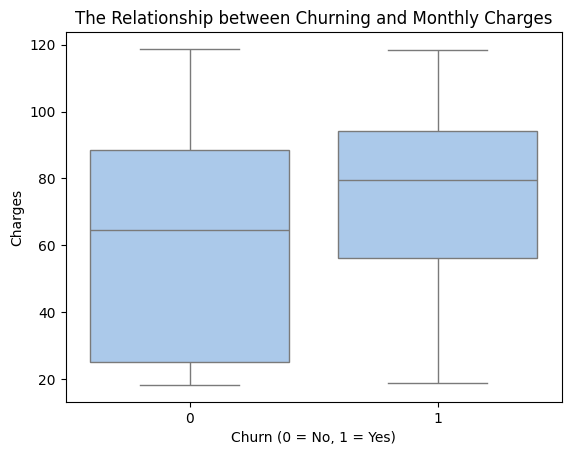

In [52]:
sns.boxplot(data= df1, x = 'Churn', y = 'MonthlyCharges')
plt.title("The Relationship between Churning and Monthly Charges")
plt.xlabel(f"Churn (0 = No, 1 = Yes)")
plt.ylabel('Charges')
plt.show()

    d. TotalCharges

In [54]:
df1.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

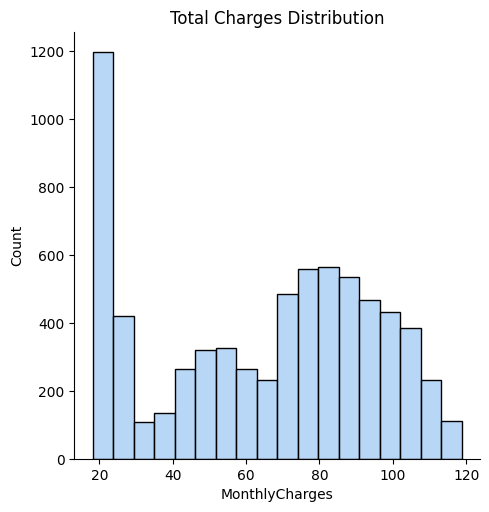

In [55]:
sns.displot(df1.MonthlyCharges)
plt.title('Total Charges Distribution')
plt.show()

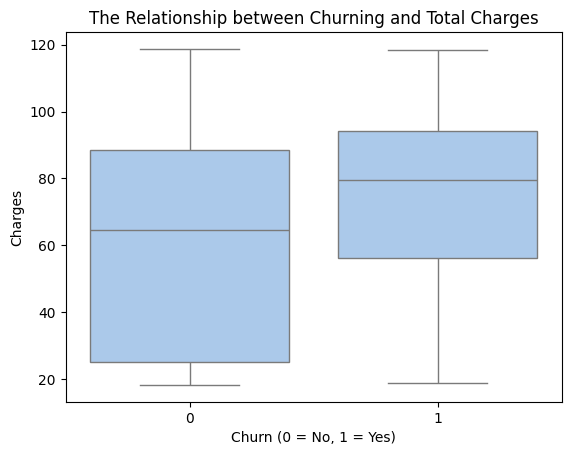

In [56]:
sns.boxplot(data= df1, x = 'Churn', y = 'MonthlyCharges')
plt.title("The Relationship between Churning and Total Charges")
plt.xlabel(f"Churn (0 = No, 1 = Yes)")
plt.ylabel('Charges')
plt.show()

4. Customer Services:

    a. PhoneService

In [57]:
show_feature_stats('PhoneService', 'Churn', df1)

Distribution of PhoneService is:
PhoneService
1    0.903299
0    0.096701
Name: proportion, dtype: float64

Distribution of PhoneService in regards to Churn is:
PhoneService  Churn
0             0         510
              1         170
1             0        4653
              1        1699
Name: Churn, dtype: int64


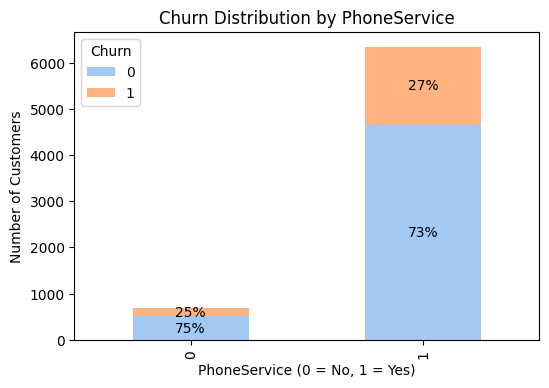

In [58]:
show_feature('PhoneService', 'Churn', df1)

    b.Multiple Lines

In [62]:
show_feature_stats('MultipleLines', 'Churn', df1)

Distribution of MultipleLines is:
MultipleLines
0    0.578072
1    0.421928
Name: proportion, dtype: float64

Distribution of MultipleLines in regards to Churn is:
MultipleLines  Churn
0              0        3046
               1        1019
1              0        2117
               1         850
Name: Churn, dtype: int64


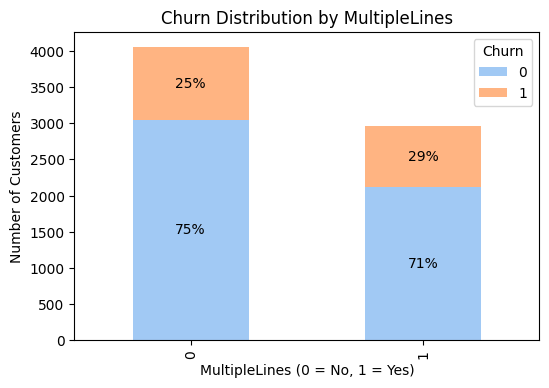

In [63]:
show_feature('MultipleLines', 'Churn', df1)

    c.Internet Services

In [64]:
show_feature_stats('InternetService', 'Churn', df1)

Distribution of InternetService is:
InternetService
Fiber optic    0.440273
DSL            0.343572
0              0.216155
Name: proportion, dtype: float64

Distribution of InternetService in regards to Churn is:
InternetService  Churn
0                0        1407
                 1         113
DSL              0        1957
                 1         459
Fiber optic      0        1799
                 1        1297
Name: Churn, dtype: int64


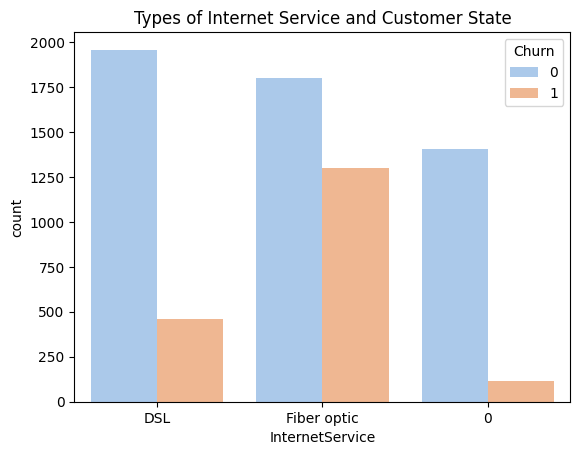

In [67]:
sns.countplot(data= df1, x= 'InternetService', hue= 'Churn')
plt.title('Types of Internet Service and Customer State')
plt.show()

    d. Online Security

In [68]:
show_feature_stats('OnlineSecurity', 'Churn', df1)

Distribution of OnlineSecurity is:
OnlineSecurity
0    0.713453
1    0.286547
Name: proportion, dtype: float64

Distribution of OnlineSecurity in regards to Churn is:
OnlineSecurity  Churn
0               0        3443
                1        1574
1               0        1720
                1         295
Name: Churn, dtype: int64


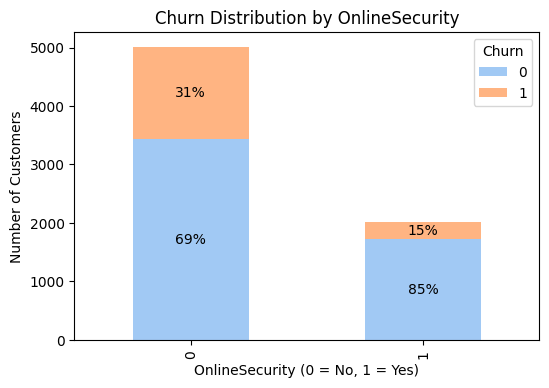

In [69]:
show_feature('OnlineSecurity', 'Churn', df1)

    e. Device Protection

In [70]:
show_feature_stats('DeviceProtection', 'Churn', df1)

Distribution of DeviceProtection is:
DeviceProtection
0    0.656143
1    0.343857
Name: proportion, dtype: float64

Distribution of DeviceProtection in regards to Churn is:
DeviceProtection  Churn
0                 0        3290
                  1        1324
1                 0        1873
                  1         545
Name: Churn, dtype: int64


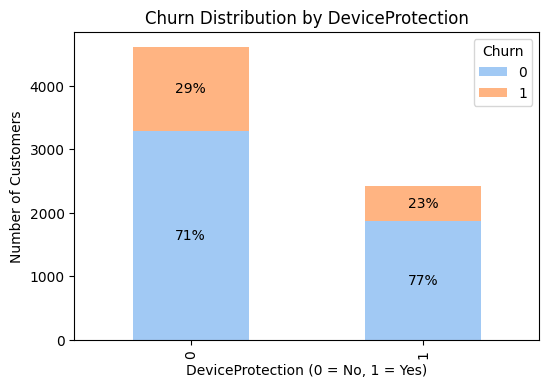

In [71]:
show_feature('DeviceProtection', 'Churn', df1)

    f. Tech Support

In [72]:
show_feature_stats('TechSupport', 'Churn', df1)

Distribution of TechSupport is:
TechSupport
0    0.709898
1    0.290102
Name: proportion, dtype: float64

Distribution of TechSupport in regards to Churn is:
TechSupport  Churn
0            0        3433
             1        1559
1            0        1730
             1         310
Name: Churn, dtype: int64


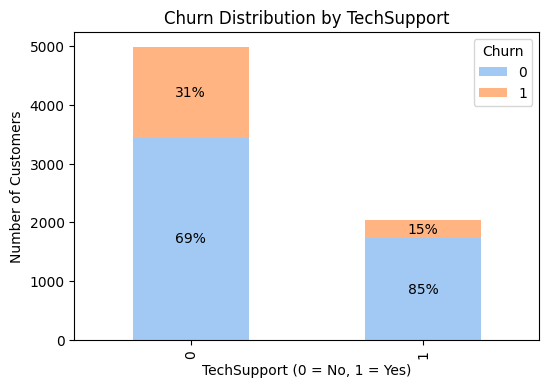

In [73]:
show_feature('TechSupport', 'Churn', df1)

    g. Streaming TV

In [74]:
show_feature_stats('StreamingTV', 'Churn', df1)

Distribution of StreamingTV is:
StreamingTV
0    0.615614
1    0.384386
Name: proportion, dtype: float64

Distribution of StreamingTV in regards to Churn is:
StreamingTV  Churn
0            0        3274
             1        1055
1            0        1889
             1         814
Name: Churn, dtype: int64


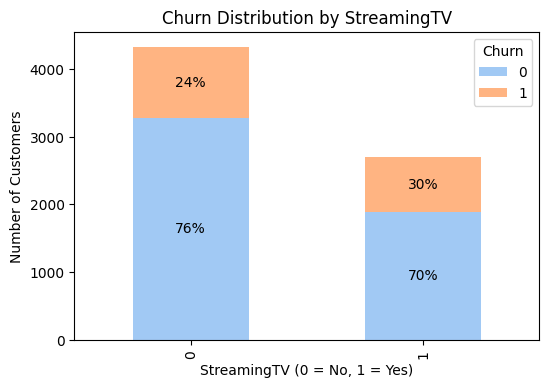

In [75]:
show_feature('StreamingTV', 'Churn', df1)

    h. Streaming Movies 

In [78]:
show_feature_stats('StreamingMovies', 'Churn', df1)

Distribution of StreamingMovies is:
StreamingMovies
0    0.611633
1    0.388367
Name: proportion, dtype: float64

Distribution of StreamingMovies in regards to Churn is:
StreamingMovies  Churn
0                0        3250
                 1        1051
1                0        1913
                 1         818
Name: Churn, dtype: int64


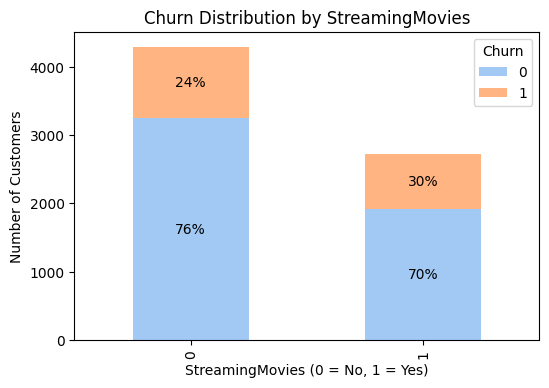

In [79]:
show_feature('StreamingMovies', 'Churn', df1)

    i.Online Backup

In [80]:
show_feature_stats('OnlineBackup', 'Churn', df1)

Distribution of OnlineBackup is:
OnlineBackup
0    0.655148
1    0.344852
Name: proportion, dtype: float64

Distribution of OnlineBackup in regards to Churn is:
OnlineBackup  Churn
0             0        3261
              1        1346
1             0        1902
              1         523
Name: Churn, dtype: int64


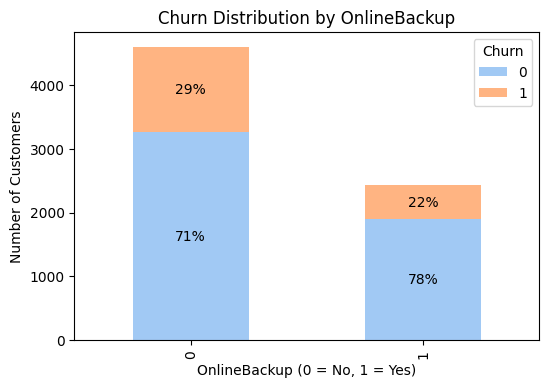

In [81]:
show_feature('OnlineBackup', 'Churn', df1)

# Final Insights

After conducting our analysis, we noticed:





- Churning rate is higher for customers with no partners or dependents.



- Customers with longer tenure are more loyal to the company.



- Customers who have a fiber optic churn more, which may indicate a problem in this service.



- Customers who signed up for online security, online backup, device protection, and tech support have lower churn rates than others.



- Monthly subscribers tend to churn more compared with one-year contracts.



- Customers who pay with electronic check or paperless billing are at high risk of churning.



- Churners have a higher monthly charge rate.